## Note, this doesn't quite work at the moment, but I'm saving it for posterity

There's something messed up about the way I'm doing the stacked bar charts. The plotly version works fine...

In [10]:
import os.path

from charcoal import utils
import sourmash
import collections

import screed

import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

In [11]:
def make_hitlist_data(hit_list_filename, omit_genus=True, num=10):
    hits = utils.HitList(hit_list_filename)
    
    endings = '.fna.gz', 'fa.gz', '.fa', '_genomic'
    
    # sort by sum of bad bp at specific rank
    if omit_genus:
        sort_by = 'family_bad_bp'
    else:
        sort_by = 'genus_bad_bp'
    
    # pick off the top num items, sorted by given sort_by
    items = list(hits.rows.items())
    items.sort(key=lambda item: -int(item[1][sort_by]))
    items = items[:num]
    items.reverse()
    
    hitlist_data = collections.defaultdict(list)
    names = hitlist_data['names']
    
    # for each item, retrieve all tax rank bp values
    for name, row in items:
        # clean up names:
        for end in endings:
            if name.endswith(end): name = name[:-len(end)]
        names.append(name)

        last_bp = 0
        for key in 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus':
            bp = row[f'{key}_bad_bp']
            bp = int(bp)
            values = hitlist_data[key]
            values.append(bp - last_bp)
            last_bp = bp
            
    return hitlist_data

['SRS1719112_8', 'LeChatelierE_2013__MH0074__bin.19.', 'ERS537328_30', 'SRR4305229_bin.5.', 'ERS396519_11', 'ERS396297_11', 'SRS1719498_9', 'ERS235530_10', 'SRS143598_15', 'SRS104400_110']
phylum [5326, 37081, 53426, 16772, 23698, 571709, 4032, 107555, 474943, 999523]
class [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
order [23467, 11356, 82137, 55546, 172897, 53099, 547836, 1317134, 185972, 498573]
family [381282, 0, 339709, 0, 498208, 0, 0, 42813, 0, 5917]
genus [291086, 677864, 269127, 768816, 363718, 602031, 711902, 24337, 1552081, 955102]


<Figure size 640x480 with 0 Axes>

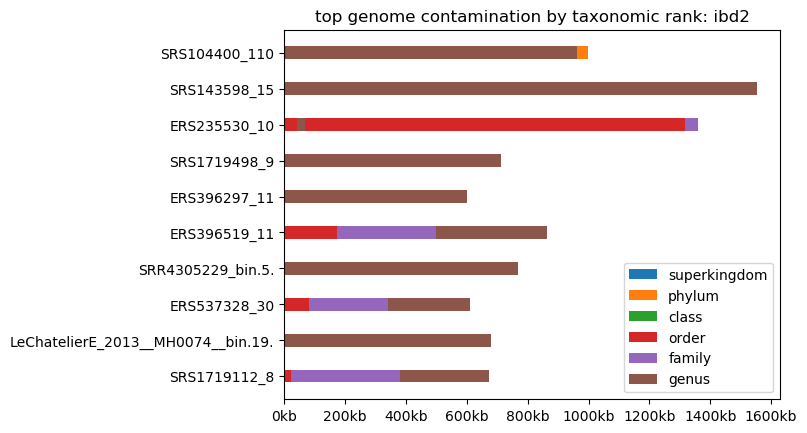

In [12]:
def plot_hitlist(hit_list_filename, omit_genus=True, num=10):
    hitlist_data = make_hitlist_data(hit_list_filename, omit_genus, num)

    plt.rcdefaults()
    plt.set_cmap('jet')
    fig, ax = plt.subplots()
    
    names = hitlist_data['names']
    superks = hitlist_data['superkingdom']
    
    N = len(names)
    ind = np.arange(N)
    width = 0.35
    
    p1 = ax.barh(ind, superks, width)
    legend_names = ['superkingdom']
    legend_handles = [p1]
    last_values = superks
    
    print(hitlist_data['names'])

    for key in 'phylum', 'class', 'order', 'family', 'genus':
        values = hitlist_data[key]
        print(key, values)
        if omit_genus and key == 'genus': break
    
        p2 = ax.barh(ind, values, width, left=last_values)
        legend_names.append(key)
        legend_handles.append(p2)
        last_values = values

    plt.legend(legend_handles, legend_names, loc='lower right')
    _ = plt.yticks(ind, names)

    # rename xticks to be in kb
    xt, *xtt = plt.xticks()
    z = []
    for k in xt:
        z.append(f'{int(k / 1000)}kb')
    ax.set_xticklabels(z)

    plt.title(f'top genome contamination by taxonomic rank: {os.path.dirname(hit_list_filename)[7:]}')
    
    return fig

_ = plot_hitlist('output.ibd2/hit_list_for_filtering.csv', omit_genus=False)

[0, 0, 142048, 0, 0, 0, 193043, 22420, 239730, 276625, 0, 338178, 0, 346066, 352460, 356872, 378038, 0, 393667, 405339]


<Figure size 640x480 with 0 Axes>

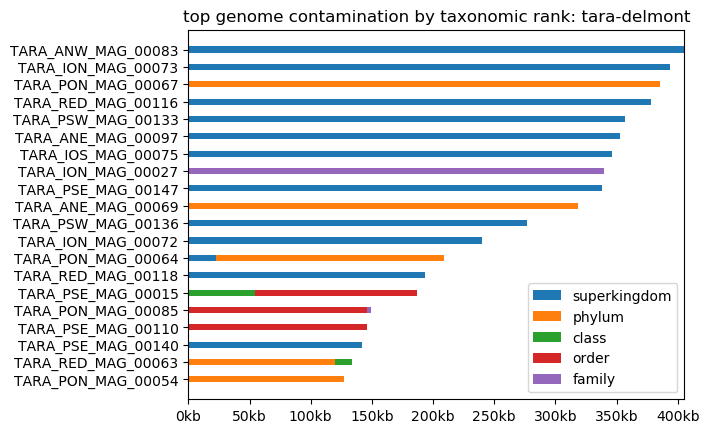

In [8]:
_ = plot_hitlist('output.tara-delmont/hit_list_for_filtering.csv', num=20)

<Figure size 640x480 with 0 Axes>

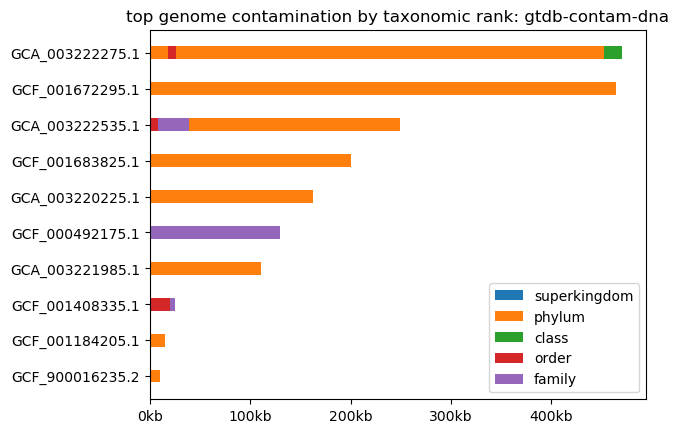

In [6]:
_ = plot_hitlist('output.gtdb-contam-dna/hit_list_for_filtering.csv')